<a id='home'></a>
<img src="../img/BCTheme.png"><br>
<div style="text-align: right">
    <p style="text-align: right; font-size:16px; font-style: italic">Filipi Rigui</p>
    <a href="https://www.linkedin.com/in/filipirigui/"><img border="0" alt="LinkedIn" src="../img/in.png" width="32" height="32"></a>   
    <a href="https://github.com/fdrigui"><img border="0" alt="LinkedIn" src="../img/gh.png" width="32" height="32"></a>
</div><br>
<p><i>Para uma melhor imersão visual, abrir projeto no <b>Jupyter ou Google Colab</b></i></p>

  [ **Readme Módulo 02**](readme.md)<br>

| [Aula 01](Aula_01.ipynb) | [Aula 3](Aula_03.ipynb) |

<h1><b><span style="color:#5C0040">Aula 02:</span></b> Primeiras previsões com Prophet</h1>

<a id='aula'></a>
________________________________
<h3><b><span style="color:#5C0040">Importação das bibliotecas</span></b></h3>

In [4]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import numpy as np
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot as plt

from fbprophet import Prophet

<h3><b><span style="color:#5C0040">Configurações do ambiente</span></b></h3>

In [5]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (15,8)

<h3><b><span style="color:#5C0040">Referência de módulos anteriores</span></b></h3>

In [6]:
url = 'https://github.com/allanspadini/Prophet_covid/raw/main/dados_covid_sp.zip'

dados = pd.read_csv(url, sep=';', parse_dates=['datahora'], infer_datetime_format='%Y-%m-%d',
                   usecols=['nome_munic','datahora','casos','casos_novos','obitos','obitos_novos'])

dados_sp = dados.query('nome_munic == "São Paulo"').copy()
dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window=7, center=False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window=7, center=False).mean()
dados_sp['mes'] = pd.DatetimeIndex(dados_sp['datahora']).month


<h3><b><span style="color:#5C0040">primeira previsão</span></b></h3>

In [22]:
# Pode-se fazer em 3 passos df = DataFrame; adiciona df['datahora'] e df[casos_novos]. Eu fiz direto
df = pd.DataFrame({'ds':dados_sp['datahora'][:400], 'y':dados_sp['casos_novos'][:400]})
df_teste = pd.DataFrame({'ds':dados_sp['datahora'][400:], 'y':dados_sp['casos_novos'][400:]})

In [23]:
# Inicializa o objeto Prophet
modelo = Prophet()

In [24]:
# Faz um fit dos dados em df 
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
# Cria um dataframe com as datas de um período futuro
dataframefuturo = modelo.make_future_dataframe(periods=43)

In [26]:
#Faz a previsão baseado no modelo fitado
previsão = modelo.predict(dataframefuturo)
previsão.head()
#Nota> yhat é a coluna onde está contida uma previsão

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-25,-149.825882,-683.971709,1402.824645,-149.825882,-149.825882,457.898870,457.898870,457.898870,457.898870,457.898870,457.898870,0.0,0.0,0.0,308.072988
1,2020-02-26,-131.885705,-716.261457,1363.267463,-131.885705,-131.885705,456.975129,456.975129,456.975129,456.975129,456.975129,456.975129,0.0,0.0,0.0,325.089424
2,2020-02-27,-113.945527,-614.766533,1566.541094,-113.945527,-113.945527,596.202571,596.202571,596.202571,596.202571,596.202571,596.202571,0.0,0.0,0.0,482.257043
3,2020-02-28,-96.005350,-786.885018,1294.040406,-96.005350,-96.005350,340.836568,340.836568,340.836568,340.836568,340.836568,340.836568,0.0,0.0,0.0,244.831218
4,2020-02-29,-78.065173,-1073.385516,1118.913640,-78.065173,-78.065173,59.096534,59.096534,59.096534,59.096534,59.096534,59.096534,0.0,0.0,0.0,-18.968639


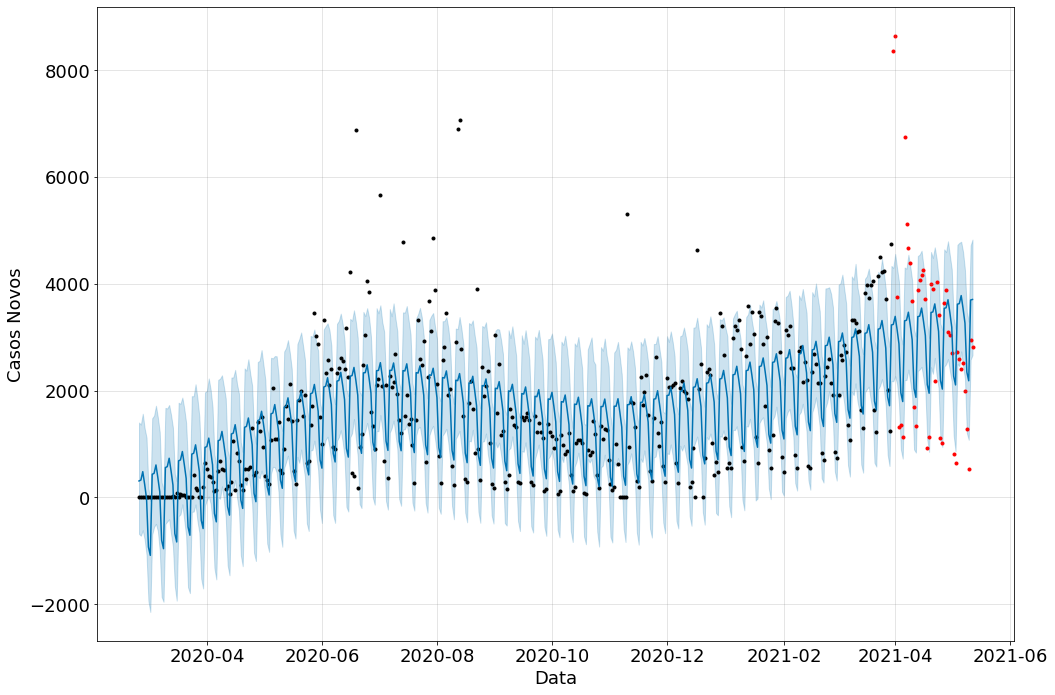

In [31]:
modelo.plot(previsão, xlabel='Data', ylabel='Casos Novos', figsize=(15,10));
plt.scatter(df_teste['ds'], df_teste['y'], color='red', marker = '.')

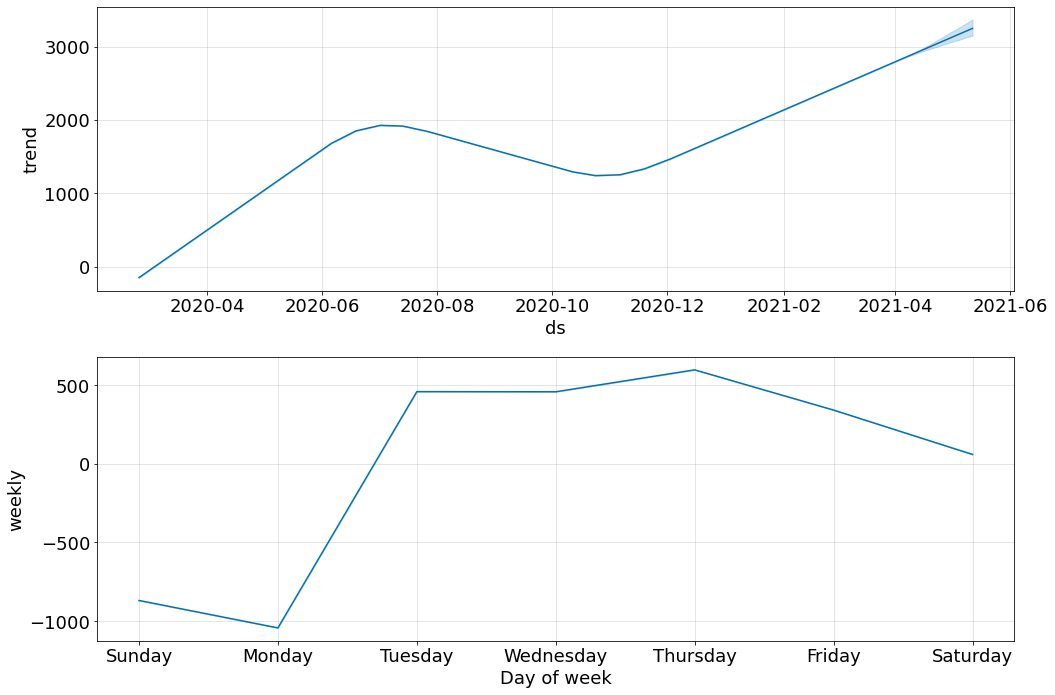

In [32]:
modelo.plot_components(previsão, figsize=(15,10));

In [ ]:
Desafio 08: Mudar os períodos de previsão.

<a id='desafios'></a>
____________________
<h2><b><span style="color:#5C0040">Desafio:</span></b></h2>

___________________________________________________
| [Home](#home) | [Aula 03](Aula_03.ipynb) |